# Geospatial Visualizations with Matplotlib

**Exploring India with data, maps and animations**

[@PratapVardhan](https://twitter.com/PratapVardhan)

<span style="display: flex;">
    <a href="https://mybinder.org/v2/gh/pratapvardhan/notebooks/blob/master/geospatial-visualizations-matplotlib.ipynb/HEAD" target="_blank">
        <img src="https://mybinder.org/badge_logo.svg" alt="Binder" height="20">
    </a>
    <a href="https://nbviewer.jupyter.org/github/pratapvardhan/notebooks/blob/master/geospatial-visualizations-matplotlib.ipynb" style="padding:0 5px;">
       <img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" height="20">
    </a>
    <a href="https://colab.research.google.com/github/pratapvardhan/notebooks/blob/master/geospatial-visualizations-matplotlib.ipynb" target="_blank">
     <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in colab"  height="20">
    </a>
</span>

In [1]:
from IPython import display
from tqdm.notebook import tqdm

In [2]:
display.Video('https://video.twimg.com/ext_tw_video/1333609745878495239/pu/vid/740x720/RJZiP-a-1Zq1gC9F.mp4?tag=10')

Libraries

In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

In [4]:
try:
    from utils import addfonts
    addfonts()
except:
    pass

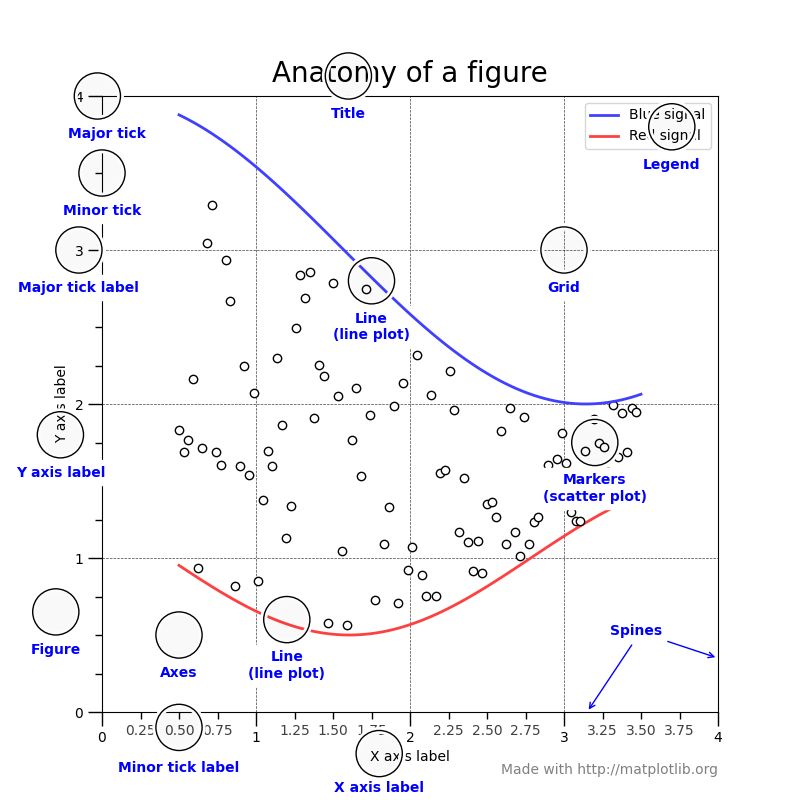

In [5]:
display.Image('https://matplotlib.org/3.2.1/_images/sphx_glr_anatomy_001.png', width='40%')

# Reading Files: GeoJSON

India States

In [6]:
gdf_states = gpd.read_file('https://github.com/pratapvardhan/data/raw/master/maps/india-states.json')
print( type(gdf_states) )
gdf_states.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


ST_NM                                           geometry
0  Andaman & Nicobar Island  MULTIPOLYGON (((93.84861 7.24051, 93.84273 7.2...
1            Andhra Pradesh  MULTIPOLYGON (((81.39375 16.33380, 81.32692 16...
2        Arunanchal Pradesh  POLYGON ((95.23730 26.67984, 95.23339 26.69068...
3                     Assam  POLYGON ((95.19587 27.03716, 95.15483 27.00028...
4                     Bihar  MULTIPOLYGON (((84.50720 24.26323, 84.49672 24...

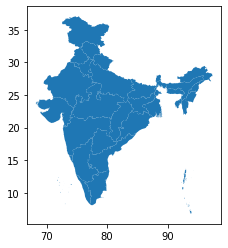

In [7]:
gdf_states.plot()

In [8]:
gdf_states[gdf_states['ST_NM'].eq('Andhra Pradesh')]

ST_NM                                           geometry
1  Andhra Pradesh  MULTIPOLYGON (((81.39375 16.33380, 81.32692 16...

<class 'shapely.geometry.multipolygon.MultiPolygon'>


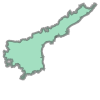

In [9]:
shape = gdf_states[gdf_states['ST_NM'].eq('Andhra Pradesh')].geometry.iloc[0]
print(type(shape))
shape

<class 'shapely.geometry.multipolygon.MultiPolygon'>


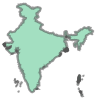

In [10]:
from shapely.ops import unary_union

outline = unary_union(gdf_states.geometry)
print(type(outline))
outline

## Railway Stations 

In [11]:
gdf_stations = gpd.read_file('https://raw.githubusercontent.com/datameet/railways/master/stations.json')
print(gdf_stations.shape)
print(gdf_stations.geometry.is_valid.sum())
gdf_stations.sample(15)

(8990, 6)
8697


state  code           name  zone  \
1426            None   RMW     ROSHAN MAU  None   
2625  Andhra Pradesh   IDL       INDALVAI   SCR   
5773          Punjab  SULH        Sulhani    NR   
1517         Gujarat   VAN       Vadhvana    WR   
8040            None  KPJG      KEREJANGA  None   
919             None   GWL     GWALIOR JN  None   
6369     West Bengal  GSGB     Gosaingram    ER   
8794            None    GA          GUDHA  None   
8504            None  TKRI         TIKIRI  None   
515             None    PY     PERUNDURAI  None   
4776       Rajasthan   JCH  JETHA CHANDAN   NWR   
584             None   BLW       BALAWALI  None   
1165            None   DVY       DEVALIYA  None   
7547            None    SS       SHIRSOLI  None   
1196       Karnataka     Y        YELIYUR   SWR   

                                address                   geometry  
1426                               None  POINT (79.98473 26.47932)  
2625           Indalvai, Andhra Pradesh  POINT (78.24435 18.54866)  
5773               Machhi Bugra, Punjab  POINT (74.86513 30.87195)  
1517                  Vadodara, Gujarat  POINT (73.48726 22.15218)  
8040                               None  POINT (84.97671 20.85581)  
919                                None  POINT (78.18229 26.21648)  
6369  Murshidabad District, West Bengal  POINT (88.21178 24.24800)  
8794                               None  POINT (75.12829 26.95004)  
8504                               None  POINT (83.09911 19.17767)  
515                                None  POINT (77.62867 11.25334)  
4776                 Chandan, Rajasthan  POINT (71.30831 26.99995)  
584                                None  POINT (78.11243 29.62743)  
1165                               None  POINT (71.01248 23.02777)  
7547                               None  POINT (75.50761 20.93299)  
1196     Bangalore-Mysore Rd, Karnataka  POINT (76.82958 12.51062)

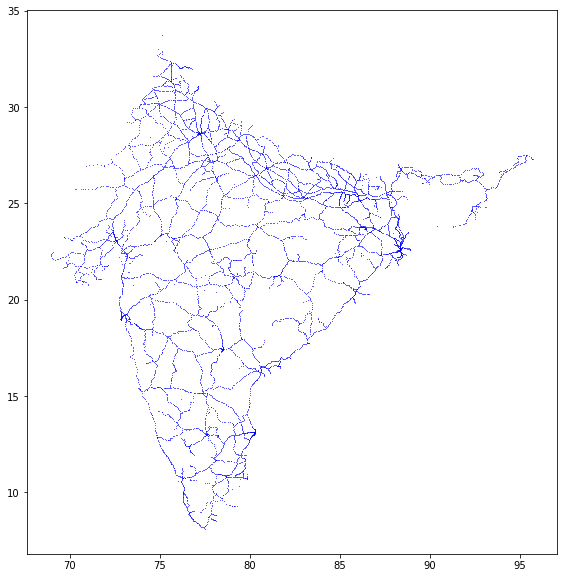

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_stations.plot(ax=ax, color='blue', markersize=0.5, linewidth=0)

Text(85, 35, 'INDIAN RAILWAYS')

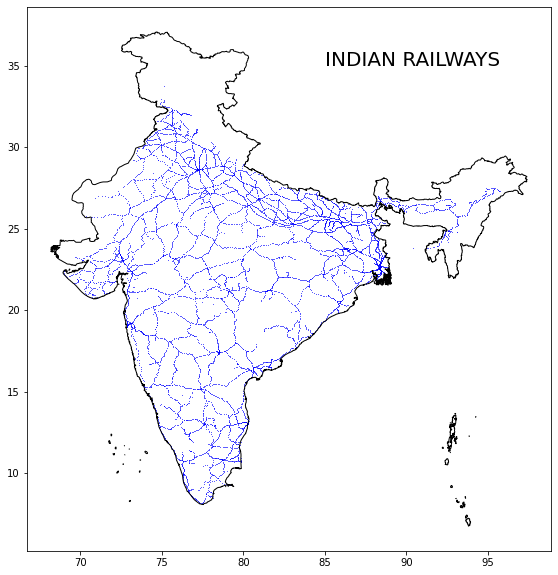

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_stations.plot(ax=ax, color='blue', markersize=0.5, linewidth=0)

gpd.GeoSeries(outline).plot(ax=ax, color='none', edgecolor='black')
ax.annotate('INDIAN RAILWAYS', xy=(85, 35), fontsize=20)

### Train time table

In [14]:
df_schedules = pd.read_csv('https://github.com/pratapvardhan/data/raw/master/indian-railways/indian-railways-time-table-2017-11-01.csv', low_memory=False)
df_schedules.head(10)

Train No    Train Name SEQ Station Code  Station Name Arrival time  \
0      107  SWV-MAO-VLNK   1          SWV  SAWANTWADI R     00:00:00   
1      107  SWV-MAO-VLNK   2         THVM        THIVIM     11:06:00   
2      107  SWV-MAO-VLNK   3         KRMI       KARMALI     11:28:00   
3      107  SWV-MAO-VLNK   4          MAO   MADGOAN JN.     12:10:00   
4      108  VLNK-MAO-SWV   1          MAO   MADGOAN JN.     00:00:00   
5      108  VLNK-MAO-SWV   2         KRMI       KARMALI     21:04:00   
6      108  VLNK-MAO-SWV   3         THVM        THIVIM     21:26:00   
7      108  VLNK-MAO-SWV   4          SWV  SAWANTWADI R     22:25:00   
8      128  MAO-KOP SPEC   1          MAO   MADGOAN JN.     19:40:00   
9      128  MAO-KOP SPEC   2         KRMI       KARMALI     20:18:00   

  Departure Time Distance Source Station Source Station Name  \
0       10:25:00        0            SWV     SAWANTWADI ROAD   
1       11:08:00       32            SWV     SAWANTWADI ROAD   
2       11:30:00       49            SWV     SAWANTWADI ROAD   
3       00:00:00       78            SWV     SAWANTWADI ROAD   
4       20:30:00        0            MAO         MADGOAN JN.   
5       21:06:00       33            MAO         MADGOAN JN.   
6       21:28:00       51            MAO         MADGOAN JN.   
7       00:00:00       83            MAO         MADGOAN JN.   
8       19:40:00        0            MAO         MADGOAN JN.   
9       20:20:00       33            MAO         MADGOAN JN.   

  Destination Station            Destination Station Name  
0                 MAO                         MADGOAN JN.  
1                 MAO                         MADGOAN JN.  
2                 MAO                         MADGOAN JN.  
3                 MAO                         MADGOAN JN.  
4                 SWV                     SAWANTWADI ROAD  
5                 SWV                     SAWANTWADI ROAD  
6                 SWV                     SAWANTWADI ROAD  
7                 SWV                     SAWANTWADI ROAD  
8                 KOP  CHHATRAPATI SHAHU MAHARAJ TERMINUS  
9                 KOP  CHHATRAPATI SHAHU MAHARAJ TERMINUS

### Marker size: number of trains stopping at station 

In [15]:
stations_trains = df_schedules['Station Code'].value_counts()
gdf_stations['unique_trains'] = gdf_stations['code'].map(stations_trains).fillna(0)

In [16]:
gdf_stations['marker_size'] = pd.cut(
    gdf_stations['unique_trains'],
    bins=[-np.inf, 5, 10, 50, 100, 200, 400, np.inf],
    labels=[.1, .5, 1, 2, 4, 6, 10]).astype(float)
gdf_stations.tail()

state  code          name  zone address                   geometry  \
8985  None  SAMT  SALEM MARKET  None    None  POINT (78.14262 11.65408)   
8986  None   OML        OMALUR  None    None  POINT (78.04678 11.73855)   
8987  None   TOS  TOLASAMPATTI  None    None  POINT (77.97955 11.76162)   
8988  None  MCRD  MECHERI ROAD  None    None  POINT (77.92186 11.80421)   
8989  None  MTDM     METUR DAM  None    None  POINT (77.83201 11.80708)   

      unique_trains  marker_size  
8985            6.0          0.5  
8986           10.0          0.5  
8987            0.0          0.1  
8988            4.0          0.1  
8989            4.0          0.1

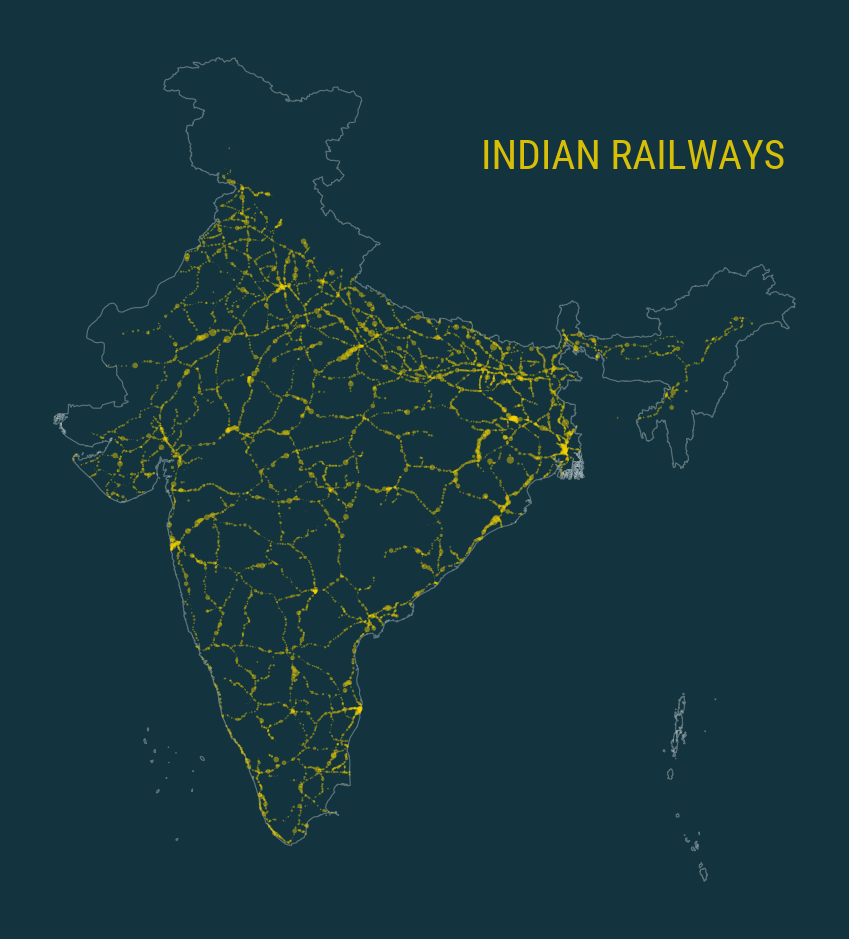

In [17]:
size, ppi = 1200, 166
bgcolor, fill = '#13343E', '#F5D300'
fig, ax = plt.subplots(figsize=(size/ppi, size/ppi), facecolor=bgcolor, dpi=ppi)
gpd.GeoSeries(outline).plot(ax=ax, color=bgcolor, edgecolor='#ffffff50', linewidth=0.5)
gdf_stations.plot(ax=ax, color=f'{fill}70', markersize=gdf_stations['marker_size'], linewidth=0)
ax.annotate('INDIAN RAILWAYS', xy=(97, 33), fontsize=18, ha='right', color=f'{fill}e0', fontfamily='Roboto Condensed')

ax.set_axis_off()

In [18]:
# Rajdhani: railway network
display.Video('https://video.twimg.com/ext_tw_video/1323461203788783618/pu/vid/720x720/qzTfeIQ1Zm1inyfV.mp4')

# OpenStreetMap: Green Spaces

Download OSM data from https://download.geofabrik.de/asia/india-latest-free.shp.zip

In [19]:
%%time
gdf_land = gpd.read_file('D:/30daykill/india-latest-free.shp/gis_osm_landuse_a_free_1.shp')
print(gdf_land['fclass'].unique())
gdf_land.head()

['park' 'commercial' 'industrial' 'retail' 'cemetery' 'residential'
 'meadow' 'forest' 'scrub' 'farm' 'nature_reserve' 'military'
 'recreation_ground' 'grass' 'quarry' 'orchard' 'allotments' 'vineyard'
 'heath']
Wall time: 20.9 s


osm_id  code      fclass                       name  \
0   9205527  7202        park              Hardy's World   
1  11979866  7209  commercial               Central Jail   
2  11981426  7204  industrial             Vardhaman Mill   
3  15802464  7202        park  Lalbagh Botanical Gardens   
4  15802611  7202        park        MN Krishna Rao Park   

                                            geometry  
0  POLYGON ((75.79821 30.97801, 75.80320 30.97803...  
1  POLYGON ((75.90694 30.91540, 75.90794 30.91546...  
2  POLYGON ((75.88794 30.90911, 75.88863 30.91053...  
3  POLYGON ((77.58013 12.94793, 77.58018 12.94806...  
4  POLYGON ((77.57393 12.94083, 77.57397 12.94189...

In [20]:
green_spaces = ['forest', 'park', 'scrub', 'grass', 'recreation_ground', 'orchard', 'meadow', 'nature_reserve', 'heath', 'vineyard']
gdf_land = gdf_land[gdf_land['fclass'].isin(green_spaces)]
print(gdf_land.shape)

(96550, 5)


## Projection

In [21]:
gdf_land.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
%%time
gdf_land_3857 = gdf_land.to_crs(epsg=3857)

Wall time: 12.4 s


## Filter by bounding box 

In [23]:
%%time
import pyproj

positions = {
    'New Delhi': (28.6139, 77.2090),
    'Mumbai':    (19.0760, 72.8777),
    'Bangalore': (12.9716, 77.5946),    
    'Kolkata':   (22.5726, 88.3639),
    'Hyderabad': (17.3950, 78.4686),
    'Chennai':   (13.0827, 80.2257)
}
gdfs = {}
limits = {}
crs_transformer = pyproj.Transformer.from_crs('EPSG:4326', 'EPSG:3857')
square_meters =  20_000  # 20km square
for name, p in tqdm(positions.items()):
    d = square_meters
    x, y = crs_transformer.transform(*p)
    # bounds
    l = [x-d/2, x+d/2, y-d/2, y+d/2]
    # filter land area to city bounds
    gdfs[name] = gdf_land_3857.cx[l[0]:l[1], l[2]:l[3]]
    limits[name] = l


Wall time: 24.4 s


## Calculate Green Areas

In [24]:
%%time
from shapely.geometry import Polygon
from shapely.ops import cascaded_union

def bounded_rect(p):
    return Polygon([[p[0], p[2]], [p[1], p[2]], [p[1], p[3]], [p[0], p[3]], [p[0], p[2]]])

areas_shapes = {c: cascaded_union(gdfs[c].geometry).intersection(bounded_rect(limits[c])) for c in positions}
areas_p = {c: areas_shapes[c].area / (square_meters**2) * 100 for c in positions}
areas_p

Wall time: 1.03 s


{'New Delhi': 12.663601939685698,
 'Mumbai': 9.256155620832834,
 'Bangalore': 6.59996583191627,
 'Kolkata': 3.181359684900573,
 'Hyderabad': 2.586622769994347,
 'Chennai': 1.990735240259314}

Green area: 12.7%


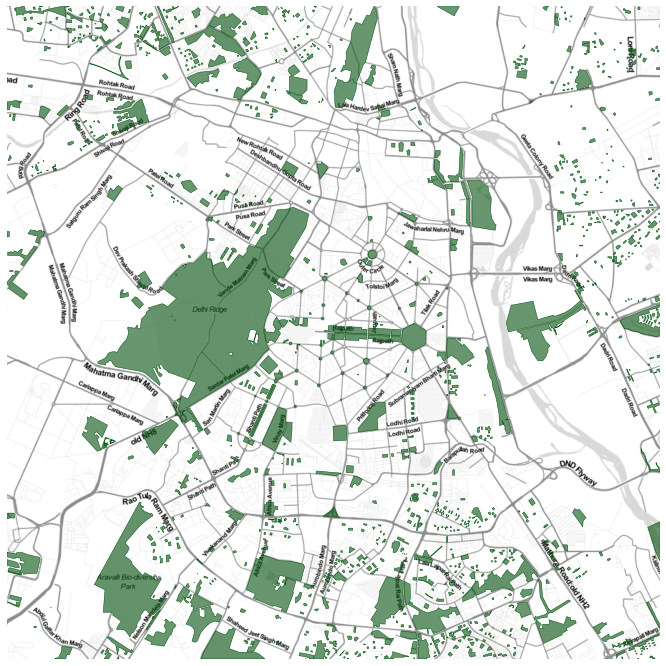

In [25]:
import contextily

place = 'New Delhi'
limit = limits[place]
print(f'Green area: {areas_p[place]:0.1f}%')
gs = gpd.GeoSeries(areas_shapes[place], crs='EPSG:3857')
ax = gs.plot(figsize=(12, 12), color='#03510F99', edgecolor='#03510F', linewidth=0.5)

ax.set_xlim(limit[0], limit[1])
ax.set_ylim(limit[2], limit[3])
ax.set_axis_off()

contextily.add_basemap(ax, source=contextily.providers.Stamen.TonerLite, attribution='', zoom=13)

Text(8584866.56465786, 3340595.3388902154, 'How green are Indian cities? Spaces include parks, forests, recreation grounds, reserves, etc.')

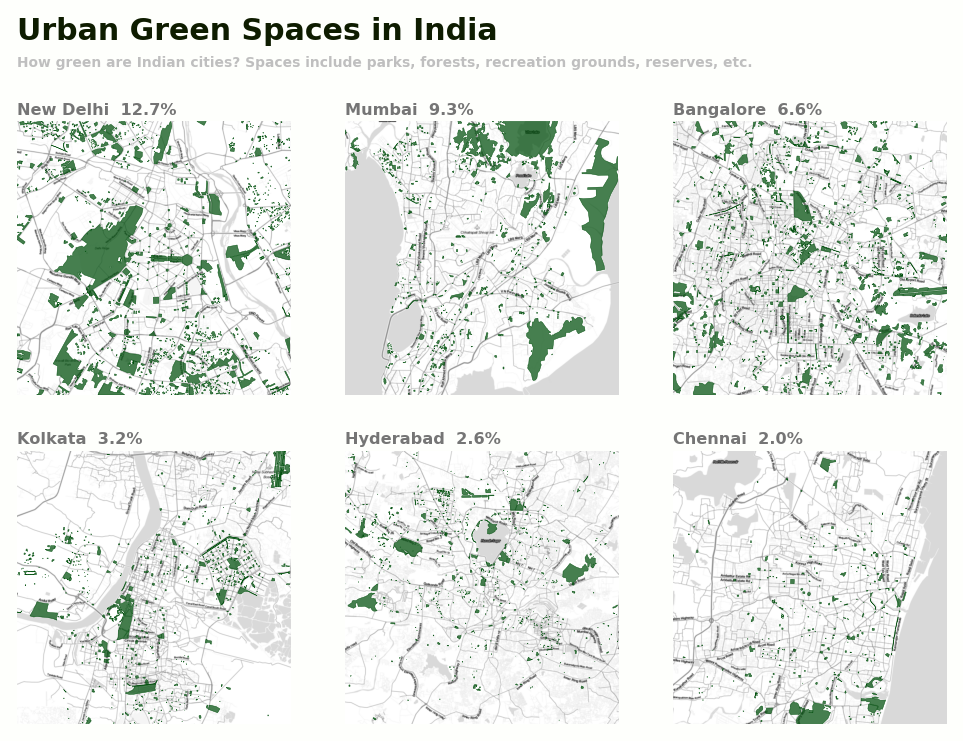

In [26]:
size_x, size_y, ppi = 1200, 800, 166
bgcolor, light1, light2, light3 = '#fefffc', '#0e1c00', '#757575', '#bfbfbf'
fig, axes = plt.subplots(2, 3, figsize=(size_x/ppi, size_y/ppi), facecolor=bgcolor, dpi=ppi)
axs = axes.flatten()
fs0, fs1, fs2, fs3 = 7, 13, 6, 5
for ai, place in enumerate(positions):
    ax = axs[ai]
    limit, area = limits[place], areas_p[place]
    gpd.GeoSeries(areas_shapes[place], crs='EPSG:3857').plot(ax=ax, color='#03510Fbb', edgecolor='#03510F', linewidth=0.2)
    ax.set_xlim(limit[0], limit[1])
    ax.set_ylim(limit[2], limit[3])
    ax.text(limit[0], limit[3] + 500, f'{place}  {area:0.1f}%', color=light2, ha='left', fontsize=fs0, fontweight='bold')         
    ax.set_axis_off()
    contextily.add_basemap(ax, source=contextily.providers.Stamen.TonerLite, attribution='', zoom=13) 
top = limits[list(positions)[0]]
axs[0].text(top[0], top[3] + 6000, 'Urban Green Spaces in India', color=light1, ha='left', fontsize=fs1, fontweight='bold')
axs[0].text(top[0], top[3] + 4000, 'How green are Indian cities? Spaces include parks, forests, recreation grounds, reserves, etc.', color=light3, ha='left', fontsize=fs2, fontweight='bold')

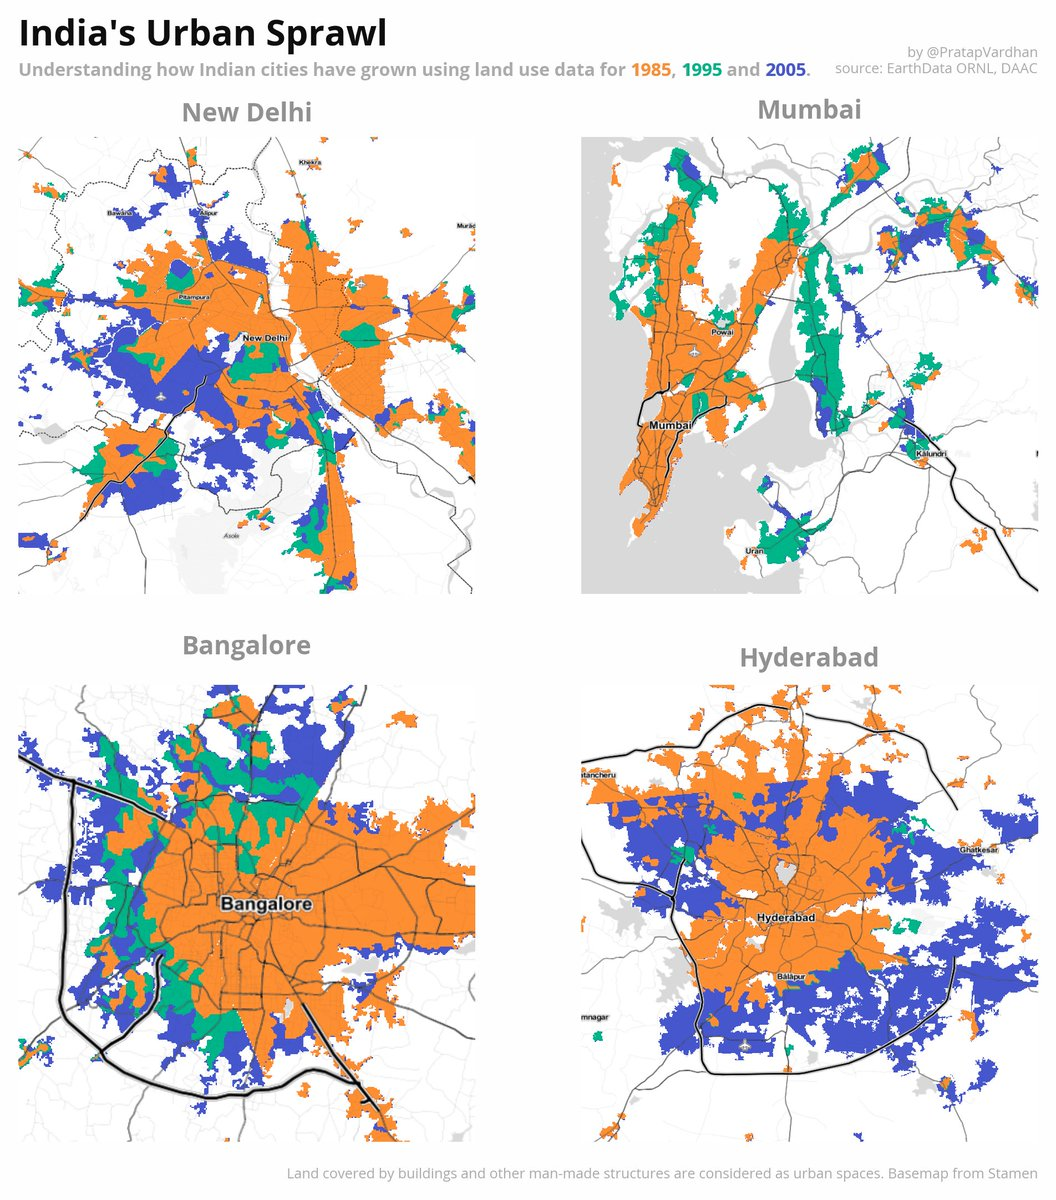

In [27]:
# India's Urban Sprawl
display.Image('https://pbs.twimg.com/media/EnJ5Wm7W4AM8gIu?format=jpg', format='jpg')

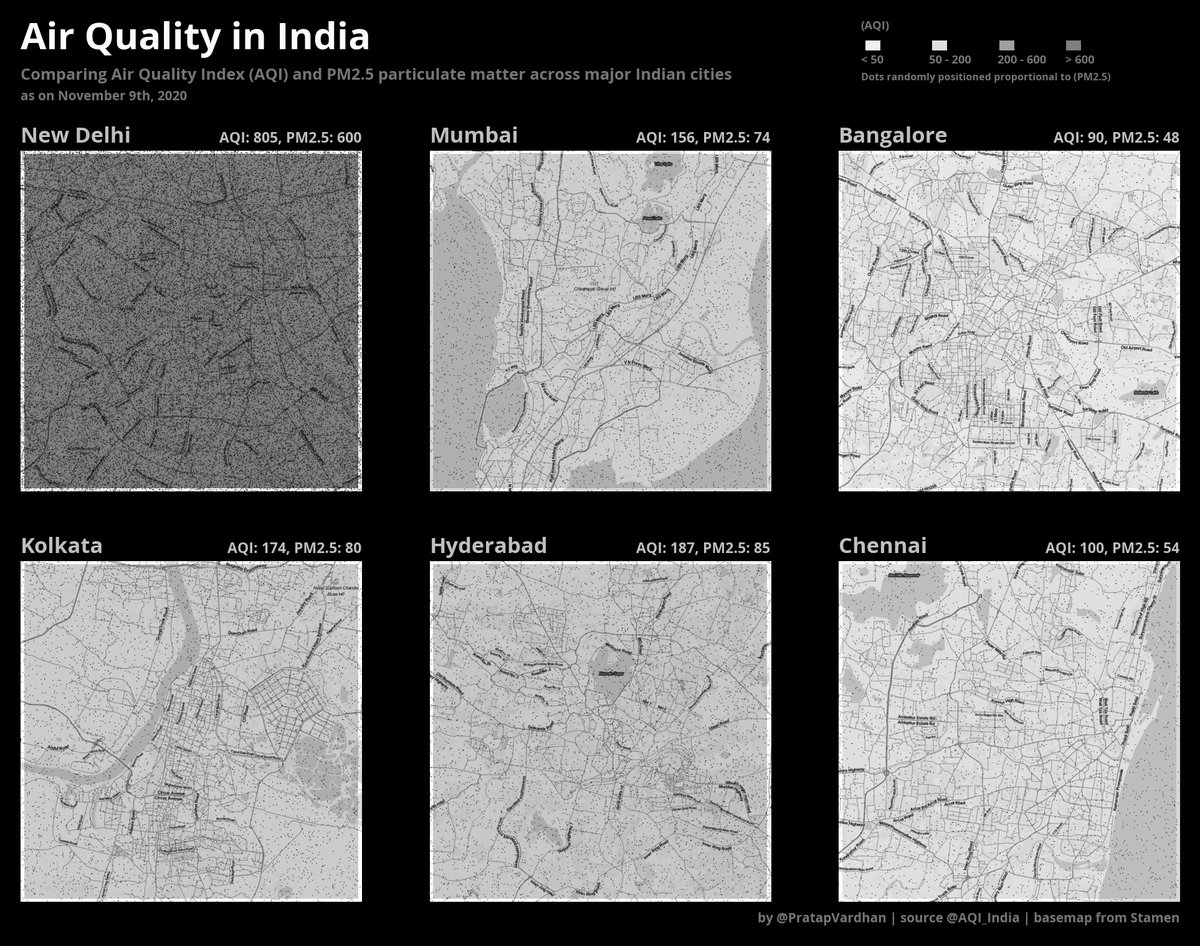

In [28]:
# Air Quality in India
display.Image('https://pbs.twimg.com/media/EmbecpbXEAAvbif?format=jpg', format='jpg')

# Animations

## Migrations: Inter-state movement of people
Source: Census 2011

In [29]:
gdf_districts = gpd.read_file('D:/github/data/maps/india-districts-2011.json')
df = pd.read_csv('D:/30daykill/migration/DS-D02-merge.csv')
df.head()

table_name  state  district area_name                    residence  \
0      D0302    0.0       0.0     INDIA                        Total   
1      D0302    0.0       0.0     INDIA                        Total   
2      D0302    0.0       0.0     INDIA  Last residence within India   
3      D0302    0.0       0.0     INDIA  Last residence within India   
4      D0302    0.0       0.0     INDIA  Last residence within India   

  residence_total enumeration     migrants  
0           Total       Rural  278203361.0  
1           Total       Urban  177584260.0  
2           Total       Total  449917418.0  
3           Total       Rural  275416210.0  
4           Total       Urban  174501208.0

In [30]:
states = ['Uttar Pradesh', 'Haryana', 'Rajasthan', 'Madhya Pradesh', 'Maharashtra', 'Karnataka', 'Andhra Pradesh', 'Odisha', 'West Bengal', 'Bihar']
df_states = df[
    df['residence'].isin(states) &
    df['residence_total'].eq('Total') & df['enumeration'].eq('Total') & df['district'].gt(0)]
df_states = df_states.set_index(['state', 'district', 'area_name', 'residence'])['migrants'].unstack().reset_index()
df_states['district'] = df_states['district'].astype('int64')
df_states.head(10)

residence  state  district    area_name  Andhra Pradesh  Bihar  Haryana  \
0            1.0         1      Kupwara             5.0  182.0     29.0   
1            1.0         2       Badgam            14.0  160.0     29.0   
2            1.0         3  Leh(Ladakh)            79.0  216.0    106.0   
3            1.0         4       Kargil             0.0   11.0     13.0   
4            1.0         5        Punch            87.0   36.0     69.0   
5            1.0         6      Rajouri            71.0  231.0    193.0   
6            1.0         7       Kathua            83.0  915.0    271.0   
7            1.0         8     Baramula            54.0  208.0     64.0   
8            1.0         9    Bandipore             3.0   84.0      8.0   
9            1.0        10     Srinagar            65.0  491.0    126.0   

residence  Karnataka  Madhya Pradesh  Maharashtra  Odisha  Rajasthan  \
0               13.0            15.0         23.0     7.0        9.0   
1                6.0            13.0         18.0    39.0       10.0   
2               50.0            84.0        123.0    69.0      148.0   
3                1.0             1.0         18.0     0.0        2.0   
4                6.0            79.0         77.0     6.0       32.0   
5               38.0           361.0        205.0    34.0      279.0   
6               51.0           246.0        189.0   153.0      382.0   
7               35.0            52.0         88.0    30.0       82.0   
8                8.0             4.0         12.0     6.0       21.0   
9               64.0           118.0        139.0    39.0      286.0   

residence  Uttar Pradesh  West Bengal  
0                  183.0        596.0  
1                  101.0        922.0  
2                  342.0        120.0  
3                   22.0          4.0  
4                  134.0         17.0  
5                  592.0        127.0  
6                 1069.0        185.0  
7                  220.0       1090.0  
8                  107.0        440.0  
9                  889.0       1009.0

In [31]:
by = 'Uttar Pradesh'
df_states.sort_values(by=by, ascending=False).head(20).style.bar(subset=states).set_precision(0)

In [32]:
gdf_districts_m = gdf_districts.merge(df_states, left_on='censuscode', right_on='district', how='left')
st_counts = gdf_districts_m[states].sum()
st_counts.sort_values(ascending=False)

Uttar Pradesh     12319592.0
Bihar              7453803.0
Rajasthan          3756716.0
Maharashtra        3068231.0
Madhya Pradesh     2979492.0
Karnataka          2502956.0
West Bengal        2405522.0
Haryana            2315915.0
Andhra Pradesh     2030004.0
Odisha             1271121.0
dtype: float64

In [33]:
# preprocessing: group certain places
# x, y, states, censuscode
dc = gdf_districts_m.geometry.centroid
df_s = pd.DataFrame(gdf_districts_m[states + ['censuscode']])
df_s['x'] = dc.x
df_s['y'] = dc.y
merges = {
    'Delhi': [90, 91, 92, 93, 94, 95, 96, 97, 98],
    'Mumbai': [517, 518, 519],
    'Kolkata': [341, 342, 338],
    'Hyderabad': [536, 537],
    'Bangalore': [572, 583]}
df_s['censuscode'] = df_s['censuscode'].map({x: p for p, v in merges.items() for x in v}).fillna(df_s['censuscode'])
df_s = df_s.groupby('censuscode', as_index=False).agg({'x': 'mean', 'y': 'mean', **{x: 'sum' for x in states}})
df_s

D:\apps\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


censuscode          x          y  Uttar Pradesh   Haryana  Rajasthan  \
0            0  74.903832  35.530808            0.0       0.0        0.0   
1            1  74.266054  34.531931          183.0      29.0        9.0   
2            2  74.662969  33.890007          101.0      29.0       10.0   
3            3  78.435920  34.338836          342.0     106.0      148.0   
4            4  76.484452  33.966601           22.0      13.0        2.0   
..         ...        ...        ...            ...       ...        ...   
622  Bangalore  77.585474  13.088251        68749.0    9675.0    90091.0   
623      Delhi  77.180500  28.644371      2854297.0  666331.0   315238.0   
624  Hyderabad  78.323667  17.338939        26813.0    3963.0    28185.0   
625    Kolkata  88.167724  22.655331       120921.0    4448.0    34531.0   
626     Mumbai  72.961864  19.229454      2302481.0   25154.0   376288.0   

     Madhya Pradesh  Maharashtra  Karnataka  Andhra Pradesh   Odisha  \
0               0.0          0.0        0.0             0.0      0.0   
1              15.0         23.0       13.0             5.0      7.0   
2              13.0         18.0        6.0            14.0     39.0   
3              84.0        123.0       50.0            79.0     69.0   
4               1.0         18.0        1.0             0.0      0.0   
..              ...          ...        ...             ...      ...   
622         16040.0      77465.0        0.0        408715.0  53506.0   
623        134867.0      63692.0    15386.0         23436.0  41162.0   
624          8128.0      60815.0    93621.0             0.0  25266.0   
625          5657.0      11835.0     1861.0          6929.0  46505.0   
626        124114.0          0.0   419461.0        174175.0  75586.0   

     West Bengal      Bihar  
0            0.0        0.0  
1          596.0      182.0  
2          922.0      160.0  
3          120.0      216.0  
4            4.0       11.0  
..           ...        ...  
622      54829.0    66934.0  
623     182356.0  1106629.0  
624      15822.0    20544.0  
625          0.0   435817.0  
626     219350.0   388859.0  

[627 rows x 13 columns]

In [34]:
import matplotlib.animation as animation
import matplotlib.patches as patches

from descartes import PolygonPatch  

Text(83.5, 31.1, 'people migrated outward from')

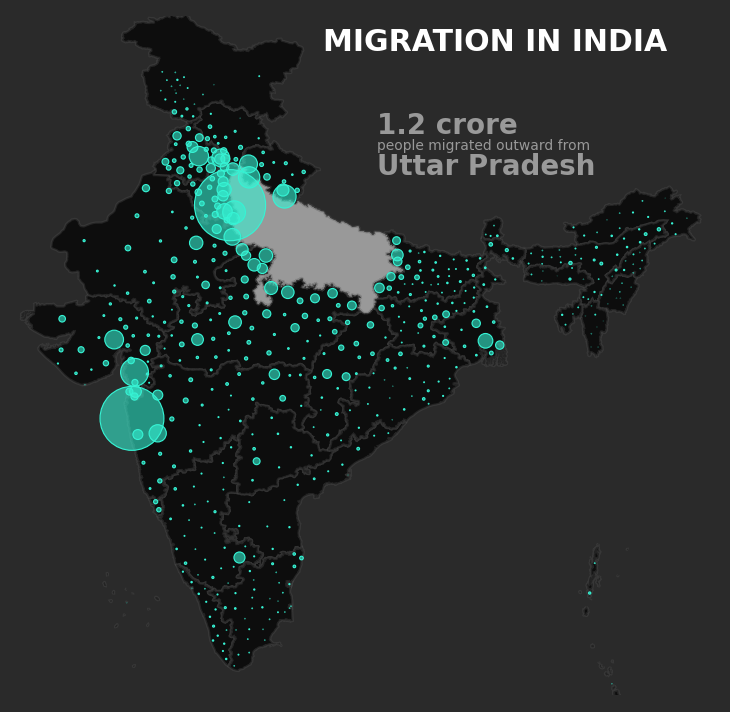

In [35]:
bgcolor, light1, mcolor = '#2A2A2A', '#ffffff', '#36F3D4'
size, ppi = 900, 166
state = 'Uttar Pradesh'
st_lookups = {'Andhra Pradesh': ['Andhra Pradesh', 'Telangana']}
st_active = '#999999'
state_colors = np.where(gdf_states['ST_NM'].eq(state), st_active, '#0D0D0D')
st_geoms = []
fig, ax = plt.subplots(figsize=(size/ppi, size/ppi), facecolor=bgcolor, dpi=ppi)
for rgeom, rfill in zip(gdf_states.geometry, state_colors):
    geom = ax.add_patch(PolygonPatch(rgeom, fc=rfill, ec='#55555550', lw=1, zorder=1))
    st_geoms.append(geom)
scat = ax.scatter(df_s.x, df_s.y, s=df_s[state]/3e3, color=f'{mcolor}95', edgecolor=mcolor, linewidth=0.5, zorder=2)  
ax.set_xlim(68, 98)
ax.set_ylim(7, 37)
ax.set_axis_off()
ax.text(96, 35.5, 'Migration in India'.upper(), color=light1, ha='right', fontsize=13, fontweight='bold')

def make_ntext(state):
    cnt = int(round(st_counts[state] / 1e5))
    return f'{round(cnt/100, 1)} crore' if (cnt > 100) else f'{cnt} lakh'

nstyle = dict(color=st_active, ha='left', fontsize=12, fontweight='bold')
ntext = [ax.text(83.5, 30, state, **nstyle), ax.text(83.5, 31.8, make_ntext(state), **nstyle)]
ax.text(83.5, 31.1, 'people migrated outward from', color=st_active, ha='left', fontsize=6)

In [36]:
%%time

def animate_func(state):
    scat.set_sizes(df_s[state]/3e3)
    state_colors = np.where(gdf_states['ST_NM'].isin(st_lookups.get(state, [state])), st_active, '#0D0D0D')
    ntext[0].set_text(state)
    ntext[1].set_text(make_ntext(state))
    for geom, c in zip(st_geoms, state_colors):
        geom.set_color(c)
        geom.set_ec('#55555550')

anim = animation.FuncAnimation(fig, animate_func, frames=states + ['Uttar Pradesh'])
display.HTML(anim.to_jshtml())

Wall time: 2.06 s


In [37]:
# Migration
display.Video('https://video.twimg.com/ext_tw_video/1330725187084558337/pu/vid/720x720/HN2wjCogH_SPT3VD.mp4?tag=10')

In [38]:
# Women MPs
display.Video('https://video.twimg.com/ext_tw_video/1328534536846708736/pu/vid/720x720/lCJHB1W4ygLm_mUW.mp4?tag=10')

# Sequencing your animation

In [39]:
# OpenStreetMap points dataset
display.Video('https://video.twimg.com/ext_tw_video/1332525568349364226/pu/vid/720x720/5dKPOBy0__rtK83o.mp4?tag=10')

# COVID-19

Daily cases and "peaks"

In [40]:
dfh = pd.read_csv('D:/30daykill/25covid/data_cases_edited.csv', low_memory=False)
dfh['date'] = pd.to_datetime(dfh['date'])
dfh.tail(10)

state district_cd district       date   cases  cumcases  deaths  \
206437  DELHI_MERGE       Delhi    Delhi 2020-12-09  2463.0  599575.0    50.0   
206438  DELHI_MERGE       Delhi    Delhi 2020-12-10  1575.0  601150.0    61.0   
206439  DELHI_MERGE       Delhi    Delhi 2020-12-11  2385.0  603535.0    60.0   
206440  DELHI_MERGE       Delhi    Delhi 2020-12-12  1935.0  605470.0    47.0   
206441  DELHI_MERGE       Delhi    Delhi 2020-12-13  1984.0  607454.0    33.0   
206442  DELHI_MERGE       Delhi    Delhi 2020-12-14  1376.0  608830.0    60.0   
206443  DELHI_MERGE       Delhi    Delhi 2020-12-15  1617.0  610447.0    41.0   
206444  DELHI_MERGE       Delhi    Delhi 2020-12-16  1547.0  611994.0    32.0   
206445  DELHI_MERGE       Delhi    Delhi 2020-12-17  1363.0  613357.0    35.0   
206446  DELHI_MERGE       Delhi    Delhi 2020-12-18  1418.0  614775.0    37.0   

        cumdeaths population  
206437     9813.0        NaN  
206438     9874.0        NaN  
206439     9934.0        NaN  
206440     9981.0        NaN  
206441    10014.0        NaN  
206442    10074.0        NaN  
206443    10115.0        NaN  
206444    10147.0        NaN  
206445    10182.0        NaN  
206446    10219.0        NaN

In [41]:
%%time
dff = dfh.groupby(['state', 'district']).rolling('7D', on='date')['cases'].mean().round(0).unstack().reset_index()
dff['id'] = dff['state'] + dff['district']
dff.head()

Wall time: 3.36 s


date              state                 district  2020-01-30 00:00:00  \
0     ANDAMAN & NICOBAR                 Nicobars                  0.0   
1     ANDAMAN & NICOBAR  North  & Middle Andaman                  0.0   
2     ANDAMAN & NICOBAR            South Andaman                  0.0   
3        ANDHRA PRADESH                Anantapur                  0.0   
4        ANDHRA PRADESH                 Chittoor                  0.0   

date  2020-02-02 00:00:00  2020-02-03 00:00:00  2020-03-02 00:00:00  \
0                     0.0                  0.0                  0.0   
1                     0.0                  0.0                  0.0   
2                     0.0                  0.0                  0.0   
3                     0.0                  0.0                  0.0   
4                     0.0                  0.0                  0.0   

date  2020-03-04 00:00:00  2020-03-05 00:00:00  2020-03-06 00:00:00  \
0                     0.0                  0.0                  0.0   
1                     0.0                  0.0                  0.0   
2                     0.0                  0.0                  0.0   
3                     0.0                  0.0                  0.0   
4                     0.0                  0.0                  0.0   

date  2020-03-07 00:00:00  ...  2020-12-10 00:00:00  2020-12-11 00:00:00  \
0                     0.0  ...                  0.0                  0.0   
1                     0.0  ...                  0.0                  0.0   
2                     0.0  ...                  0.0                  0.0   
3                     0.0  ...                 24.0                 25.0   
4                     0.0  ...                 81.0                 83.0   

date  2020-12-12 00:00:00  2020-12-13 00:00:00  2020-12-14 00:00:00  \
0                     0.0                  0.0                  0.0   
1                     0.0                  0.0                  0.0   
2                     0.0                  0.0                  0.0   
3                    23.0                 21.0                 20.0   
4                    83.0                 83.0                 84.0   

date  2020-12-15 00:00:00  2020-12-16 00:00:00  2020-12-17 00:00:00  \
0                     0.0                  0.0                  NaN   
1                     0.0                  0.0                  NaN   
2                     0.0                  0.0                  NaN   
3                    22.0                 19.0                  NaN   
4                    86.0                 88.0                  NaN   

date  2020-12-18 00:00:00                                        id  
0                     NaN                 ANDAMAN & NICOBARNicobars  
1                     NaN  ANDAMAN & NICOBARNorth  & Middle Andaman  
2                     NaN            ANDAMAN & NICOBARSouth Andaman  
3                     NaN                   ANDHRA PRADESHAnantapur  
4                     NaN                    ANDHRA PRADESHChittoor  

[5 rows x 297 columns]

In [42]:
gdf_h = gpd.read_file('D:/30daykill/25covid/india_hil_edited.json')[['stname', 'DISTRICT', 'geometry']]
gdf_h['id'] = gdf_h['stname'] + gdf_h['DISTRICT']
c = gdf_h.centroid
gdf_h['x'] = c.x
gdf_h['y'] = c.y
gdf_h.head(10)

stname     DISTRICT  \
0  JAMMU & KASHMIR         None   
1  JAMMU & KASHMIR         None   
2  JAMMU & KASHMIR  Leh(ladakh)   
3  JAMMU & KASHMIR       Kargil   
4  JAMMU & KASHMIR      Kupwara   
5  JAMMU & KASHMIR    Bandipore   
6  JAMMU & KASHMIR     Baramula   
7  JAMMU & KASHMIR    Ganderbal   
8  JAMMU & KASHMIR     Anantnag   
9  JAMMU & KASHMIR     Kishtwar   

                                            geometry  \
0  POLYGON ((77.96208 35.46486, 77.96464 35.43868...   
1  POLYGON ((79.04166 33.73936, 79.02057 33.74594...   
2  POLYGON ((77.74267 35.25828, 77.82380 35.30467...   
3  POLYGON ((76.41101 34.89559, 76.41594 34.87976...   
4  POLYGON ((74.61483 34.79795, 74.61483 34.79168...   
5  POLYGON ((75.20931 34.38479, 75.19791 34.38668...   
6  POLYGON ((74.68117 34.17555, 74.68899 34.16913...   
7  POLYGON ((75.20931 34.38479, 75.23040 34.37492...   
8  POLYGON ((75.49710 34.23339, 75.50476 34.23370...   
9  POLYGON ((76.77127 33.24956, 76.77399 33.24141...   

                           id          x          y  
0                         NaN  74.887228  35.602101  
1                         NaN  79.095579  35.026635  
2  JAMMU & KASHMIRLeh(ladakh)  77.913130  33.863156  
3       JAMMU & KASHMIRKargil  76.365918  34.078376  
4      JAMMU & KASHMIRKupwara  74.142523  34.525260  
5    JAMMU & KASHMIRBandipore  74.796345  34.499478  
6     JAMMU & KASHMIRBaramula  74.304065  34.152626  
7    JAMMU & KASHMIRGanderbal  75.024989  34.282379  
8     JAMMU & KASHMIRAnantnag  75.321335  33.826637  
9     JAMMU & KASHMIRKishtwar  75.966274  33.553039

In [43]:
dff = dff.merge(gdf_h.set_index('id')[['x', 'y']], on='id', how='left')
dff.head(10)

state                 district  2020-01-30 00:00:00  \
0  ANDAMAN & NICOBAR                 Nicobars                  0.0   
1  ANDAMAN & NICOBAR  North  & Middle Andaman                  0.0   
2  ANDAMAN & NICOBAR            South Andaman                  0.0   
3     ANDHRA PRADESH                Anantapur                  0.0   
4     ANDHRA PRADESH                 Chittoor                  0.0   
5     ANDHRA PRADESH            East Godavari                  0.0   
6     ANDHRA PRADESH                   Guntur                  0.0   
7     ANDHRA PRADESH                  Krishna                  0.0   
8     ANDHRA PRADESH                  Kurnool                  0.0   
9     ANDHRA PRADESH                 Prakasam                  0.0   

   2020-02-02 00:00:00  2020-02-03 00:00:00  2020-03-02 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   
5                  0.0                  0.0                  0.0   
6                  0.0                  0.0                  0.0   
7                  0.0                  0.0                  0.0   
8                  0.0                  0.0                  0.0   
9                  0.0                  0.0                  0.0   

   2020-03-04 00:00:00  2020-03-05 00:00:00  2020-03-06 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   
5                  0.0                  0.0                  0.0   
6                  0.0                  0.0                  0.0   
7                  0.0                  0.0                  0.0   
8                  0.0                  0.0                  0.0   
9                  0.0                  0.0                  0.0   

   2020-03-07 00:00:00  ...  2020-12-12 00:00:00  2020-12-13 00:00:00  \
0                  0.0  ...                  0.0                  0.0   
1                  0.0  ...                  0.0                  0.0   
2                  0.0  ...                  0.0                  0.0   
3                  0.0  ...                 23.0                 21.0   
4                  0.0  ...                 83.0                 83.0   
5                  0.0  ...                 48.0                 48.0   
6                  0.0  ...                 85.0                 78.0   
7                  0.0  ...                 90.0                 80.0   
8                  0.0  ...                 13.0                 16.0   
9                  0.0  ...                 24.0                 22.0   

   2020-12-14 00:00:00  2020-12-15 00:00:00  2020-12-16 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                 20.0                 22.0                 19.0   
4                 84.0                 86.0                 88.0   
5                 47.0                 46.0                 47.0   
6                 69.0                 64.0                 58.0   
7                 81.0                 76.0                 68.0   
8                 17.0                 18.0                 16.0   
9                 24.0                 25.0                 24.0   

   2020-12-17 00:00:00  2020-12-18 00:00:00  \
0                  NaN                  NaN   
1                  NaN                  NaN   
2                  NaN                  NaN   
3    

### Peak (triangle) helper function

In [44]:
def triangle_verts(d, width=0.4):
    return np.c_[d[:,0] - width/2, d[:,1], d[:,0] + width/2, 
                  d[:,1], d[:,0], d[:,2]].reshape(len(d), 3, 2)

In [45]:
dates = dff.columns.intersection(pd.date_range('2020-03-15', '2020-12-15'))
places = 'Delhi, Bangalore, Mumbai, Pune, Kolkata, Kozhikode, Chennai, Hyderabad, Nagpur, Lucknow, Patna, Jaipur, East Godavari'.split(', ')
places_xy = dff[dff['district'].isin(places)].set_index('district')[['x', 'y'] + dates.tolist()].to_dict(orient='index')
ha_s = {'East Godavari': 'left', 'Chennai': 'left', 'Mumbai': 'right', 'Pune': 'left', 'Thane': 'left', 'Kozhikode': 'right'}

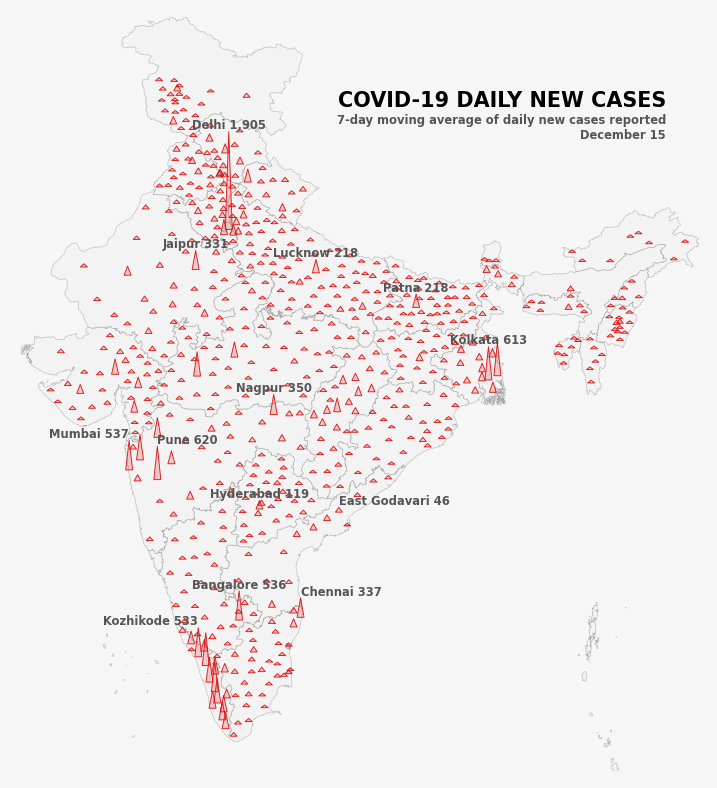

In [46]:
from matplotlib.collections import PolyCollection

bgcolor, markcolor, dark1, dark2, dark3 = '#F6F6F6', '#db0f0f', '#000000', '#555555', '#999999'
size, ppi = 1000, 166

fig, ax = plt.subplots(figsize=(size/ppi, size/ppi), facecolor=bgcolor, dpi=ppi)
gdf_states.plot(ax=ax, color='#F3F3F3', edgecolor=f'{dark2}50', linewidth=0.3)

date = dates[-1]
ydh = lambda y: 0.1 * ( y > 0) + y / 500
tri_d = np.array([(r.x, r.y, r.y + ydh(r[date])) for _, r in dff.iterrows()])
lws = np.where(dff[date].fillna(0).eq(0), 0, 0.4)
poly = PolyCollection(triangle_verts(tri_d, width=0.3), facecolor=f'{markcolor}30', edgecolor=f'{markcolor}ee', linewidth=lws)
ax.add_collection(poly)

for p in places:
    pxy = places_xy[p]
    value = pxy[date]
    ty = pxy['y'] + ydh(value + 50)
    ax.text(pxy['x'], min(ty, 37), f'{p} {value:,.0f}', color=dark2, ha=ha_s.get(p, 'center'), fontsize=5, fontweight='bold')

ax.text(96, 33.5, 'COVID-19 daily new cases'.upper(), color=dark1, ha='right', fontsize=9, fontweight='bold')
text = f'7-day moving average of daily new cases reported\n{date.strftime("%B %d")}'
ax.text(96, 32.2, text, color=dark2, ha='right', fontsize=5, fontweight='bold')
ax.set_xlim(68, 97.5)
ax.set_ylim(6.9, 37.1)
ax.set_axis_off()

In [47]:
# COVID-19 daily cases
display.Video('https://video.twimg.com/ext_tw_video/1331802305629474816/pu/vid/720x720/bOSRbD6J90YA0iCs.mp4?tag=10')

# Data from satellites

In [48]:
# Solar Potential
display.Video('https://video.twimg.com/ext_tw_video/1325634453847347201/pu/vid/720x720/g4eEisOOlYn-HfkF.mp4?tag=10')

In [49]:
# Plant Growth NDVI
display.Video('https://video.twimg.com/ext_tw_video/1326371016713662464/pu/vid/720x720/j_3wfpiPnkY4fbZt.mp4?tag=10')

### Links

<div style='display:flex'>
    <div style="padding-right:1rem;padding-top:3rem;">
        <div>github.com/pratapvardhan/notebooks</div>
        <div>github.com/pratapvardhan/data</div>
        <div>twitter.com/PratapVardhan/status/1323066674011082753</div>
    </div>
    <video src="https://video.twimg.com/ext_tw_video/1333609745878495239/pu/vid/740x720/RJZiP-a-1Zq1gC9F.mp4?tag=10" controls="" data-paused-by-reveal="" width="40%"></video>
</div>